# Assignment 2: Web API and Data Storage

In this homework, you will work closely with data from a popular game called Dota 2. Here is an excerpt from wikipedia about the game. 


>Dota 2 is a free-to-play multiplayer online battle arena (MOBA) video game developed and published by Valve Corporation. The game is the stand-alone sequel to Defense of the Ancients (DotA), which was a community-created mod for Blizzard Entertainment's Warcraft III: Reign of Chaos and its expansion pack, The Frozen Throne. Dota 2 is played in matches between two teams that consist of five players, with both teams occupying their own separate base on the map. Each of the ten players independently control a powerful character, known as a "hero", that each feature unique abilities and different styles of play. During a match, a player and their team collects experience points and items for their heroes in order to fight through the opposing team's defenses. A team wins by being the first to destroy a large structure located in the opposing team's base, called the "Ancient".



## Part 1: Accessing the data

First you will need to get an API key from Valve from here https://steamcommunity.com/dev/apikey. Once you have gotten an API key, you can start requesting data. I recommend using a Python wrapper for it https://dota2api.readthedocs.io/en/latest/index.html. Follow the installation guide on the page. To test your installation, try running the following code.

```python
import dota2api
apikey = ""
api = dota2api.Initialise(apikey)
match = api.get_match_details(match_id=1000193456)
```

In [1]:
# import stuffs

%matplotlib inline

import dota2api
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import pickle
import re
import requests
import time

from bs4 import BeautifulSoup
from email.Utils import formatdate

matplotlib.style.use('ggplot')

In [2]:
# Fill code here

with open('secret.json', 'r') as json_data:
    d = json.load(json_data)

apikey = d['key']
api = dota2api.Initialise(apikey)

In [3]:
match = api.get_match_details(match_id=1000193456)

In [4]:
match

{u'barracks_status_dire': 63,
 u'barracks_status_radiant': 63,
 u'cluster': 133,
 'cluster_name': u'Europe West',
 u'dire_captain': 87278757,
 u'dire_logo': 543025270456493033,
 u'dire_name': u'Team Secret',
 u'dire_score': 0,
 u'dire_team_complete': 1,
 u'dire_team_id': 1838315,
 u'duration': 1964,
 u'engine': 0,
 u'first_blood_time': 124,
 u'flags': 0,
 u'game_mode': 16,
 'game_mode_name': u'Captains Draft',
 u'human_players': 10,
 u'leagueid': 2140,
 'lobby_name': u'Practice',
 u'lobby_type': 1,
 u'match_id': 1000193456,
 u'match_seq_num': 895207201,
 u'negative_votes': 17,
 u'picks_bans': [{u'hero_id': 12, u'is_pick': False, u'order': 0, u'team': 1},
  {u'hero_id': 91, u'is_pick': False, u'order': 1, u'team': 0},
  {u'hero_id': 15, u'is_pick': False, u'order': 2, u'team': 1},
  {u'hero_id': 78, u'is_pick': False, u'order': 3, u'team': 0},
  {u'hero_id': 30, u'is_pick': False, u'order': 4, u'team': 1},
  {u'hero_id': 7, u'is_pick': False, u'order': 5, u'team': 0},
  {u'hero_id': 69,

In [4]:
# Expected output for the match

{u'barracks_status_dire': 63,
 u'barracks_status_radiant': 63,
 u'cluster': 133,
 'cluster_name': u'Europe West',
 u'dire_captain': 87278757,
 u'dire_logo': 543025270456493033,
 u'dire_name': u'Team Secret',
 u'dire_score': 0,
 u'dire_team_complete': 1,
 u'dire_team_id': 1838315,
 u'duration': 1964,
 u'engine': 0,
 u'first_blood_time': 124,
 u'flags': 0,
 u'game_mode': 16,
 'game_mode_name': u'Captains Draft',
 u'human_players': 10,
 u'leagueid': 2140,
 'lobby_name': u'Practice',
 u'lobby_type': 1,
 u'match_id': 1000193456,
 u'match_seq_num': 895207201,
 u'negative_votes': 17,
 u'picks_bans': [{u'hero_id': 12, u'is_pick': False, u'order': 0, u'team': 1},
  {u'hero_id': 91, u'is_pick': False, u'order': 1, u'team': 0},
  {u'hero_id': 15, u'is_pick': False, u'order': 2, u'team': 1},
  {u'hero_id': 78, u'is_pick': False, u'order': 3, u'team': 0},
  {u'hero_id': 30, u'is_pick': False, u'order': 4, u'team': 1},
  {u'hero_id': 7, u'is_pick': False, u'order': 5, u'team': 0},
  {u'hero_id': 69,

## Part 2: Crawling and storing the data

In this part, you will have to collect data from 1000 Dota2 matches and storing the data for later use. 

I left it up to you on how to collect the 1000 match data. Here is a bit of advice. Don't make too many requests at one time you will risk getting banned. To be safe, add a little bit of delay (sleep) between consecutive requests.

After you have obtained the data save it as a Pickle file or a Sqlite DB.

In [5]:
# Fill code here

# keeping response from calling dota2api 10 times
# number of matches for each api call is limited
# to 100 matches
raw_matches = []
n = 10
start_at_match_seq_num = 1000193456

while len(raw_matches) != n:
    matches = api.get_match_history_by_seq_num(start_at_match_seq_num=start_at_match_seq_num)
    if matches['status'] == 1: # if request status is successful
        start_at_match_seq_num = matches['matches'][99]['match_seq_num'] + 1
        raw_matches.append(matches)
    time.sleep(5)

print "-"*30
print "Done calling dota2api"
print "-"*30

------------------------------
Done calling dota2api
------------------------------


In [6]:
# putting all the matches into one place
matches = []

for raw_match in raw_matches:
    for match in raw_match['matches']:
        matches.append(match)

In [7]:
# storing data into pickle file

data = {'matches': matches}

with open('matches.p', 'wb') as f:
    pickle.dump(matches, f)

In [ ]:
# Alternative method

# Getting match ids from dotabuff 
# https://www.dotabuff.com/esports/matches

## Part 3:  Loading up data and analysis

We begin this part by loading up the data you stored in a pickle file earlier.


In [3]:
# Fill code here

with open('matches.p', 'rb') as f:
    matches = pickle.load(f)

### 3.1 Find average win rate for each faction

Your answer should be numerical values

In [4]:
# Fill code here

df = pd.DataFrame(matches)

win_rate = df.groupby(u'radiant_win').size().to_dict()
radiant_win = win_rate[True]
dire_win = win_rate[False]

n_match = 1000.
radiant_average_win = radiant_win/n_match
dire_average_win = dire_win/n_match

print "Average win for radiant: {}".format(radiant_average_win)
print "Average win for dire: {}".format(dire_average_win)

Average win for radiant: 0.533
Average win for dire: 0.467


### 3.2 Game duration

Plot a histogram to show distribution of game duration. Also mark on the plot: the **mean** and **median**.

In [5]:
# Fill code here

df['duration'] = df['duration'] / 60. # convert from second to minute

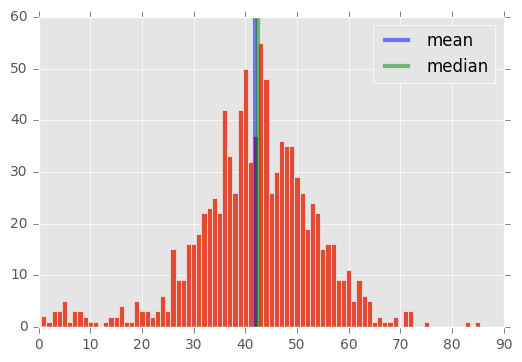

In [6]:
df['duration'].hist(bins=np.arange(0.5, 90.5, 1))
plt.axvline(np.mean(df['duration']), color='b', label='mean', lw = 3, alpha = 0.5)
plt.axvline(np.median(df['duration']), color='g', label='median', lw = 3, alpha = 0.5)
plt.legend()

### 3.3 First-blood time

Similar to previous part, plot a histogram to show distribution of first-blood time. Also mark on the plot: the **mean** and **median**.

In [7]:
df['first_blood_time'] = df['first_blood_time'] / 60. # convert from second to minute

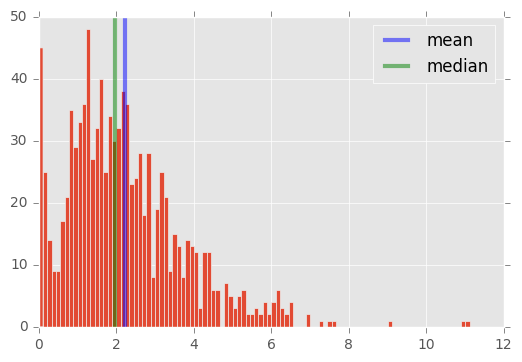

In [8]:
# df['first_blood_time'].hist(bins=np.arange(0.5, 90.5, 1))
df['first_blood_time'].hist(bins=100)
plt.axvline(np.mean(df['first_blood_time']), color='b', label='mean', lw = 3, alpha = 0.5)
plt.axvline(np.median(df['first_blood_time']), color='g', label='median', lw = 3, alpha = 0.5)
plt.legend()

### 3.4 Hero popularity and win rate

Make a stacked horizontal barchart to display the number of games played by each hero and how many of them are victories. You must sort the bar so that the most popular hero appears on top.

In [10]:
# getting heroes and store into pickle file

heroes_response = api.get_heroes()
heroes = {'heroes': heroes_response['heroes']}

with open('heroes.p', 'wb') as f:
    pickle.dump(heroes, f)

print "Last ran on: {}".format(formatdate(localtime=True))

Last ran on: Sat, 28 Jan 2017 21:36:47 +0700


In [9]:
# load heroes from pickle file

with open('heroes.p', 'rb') as f:
    heroes = pickle.load(f)

heroes = heroes['heroes']

In [10]:
# Fill code here
heroes_lookup = {hero[u'id']: hero[u'localized_name'] for hero in heroes}
heroes_pickup = {}
heroes_win = {}

In [11]:
# Determining which team (radiant or dire) each hero is
# https://wiki.teamfortress.com/wiki/WebAPI/GetMatchDetails#Player_Slot

for i_df in df.index:
    radiant_win = df['radiant_win'][i_df]
    players = df['players'][i_df]
    for player in players:
        hero_id = player['hero_id']
        player_slot = player['player_slot']
        bit_mask = 0x80 # bitmask for getting msb in 8 bit
        is_radiant = ((bit_mask & player_slot) >> 7) == False
        if is_radiant:
            score = 1 if radiant_win else 0
        else:
            score = 0 if radiant_win else 1
        try:
            hero_name = heroes_lookup[hero_id]
            heroes_pickup[hero_name] = heroes_pickup.get(hero_name, 0) + 1
            heroes_win[hero_name] = heroes_win.get(hero_name, 0) + score
        except KeyError:
            continue

In [12]:
df_heroes = pd.DataFrame([heroes_pickup, heroes_win], index=['pick', 'win']).T

In [13]:
df_heroes

,pick,win
Abaddon,59,28
Alchemist,61,23
Ancient Apparition,51,27
Anti-Mage,147,63
Axe,218,112
Bane,44,13
Batrider,46,22
Beastmaster,18,9
Bloodseeker,125,63
Bounty Hunter,152,60


In [45]:
# df_heroes_pickup.groupby('hero_name').count().plot(kind='barh', figsize=(15, 50), stacked=True)
# df_heroes_pickup.groupby(['pick', 'win']).count().plot(kind='barh', figsize=(15, 50), stacked=True)

### 3.5  Kills/Death/Assist

Make a grouped horizonal barchart to display: total kills, total deaths, total assists for each hero on the same axis.

In [ ]:
# Fill code here

### 3.6 Richest Heros

Find out the top 10 heros with highest Gold per Minute.

In [ ]:
# Fill code here

### 3.6 Popular Items (overall)

Find out the top 10 items that most frequently used overall.

In [ ]:
# Fill code here

### 3.7 Popular Items (among winners)

Find out the top 10 items that most frequently used among the winning team. 

In [ ]:
# Fill code here

### 3.8 Hero and items

Pick 3 heros of your choice. Find out the most commonly purchased items for them. Are the items similar or different between the victors and losers? You can figure out this by finding the items for victors and for losers separately and compare them.

In [ ]:
# Fill code here

### 3.9 Your pick!

Come up with a question of your own and find the answer from the dataset.

STATE YOUR QUESTION HERE

In [ ]:
# Fill code here